MNS 2
===
Dominik Krzemiński

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Visual stimulus

In [9]:
nx, ny = (50, 50)
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
dx = np.abs(x[-1]-x[-2])
dy = np.abs(x[-1]-x[-2])
xv, yv = np.meshgrid(x, y)

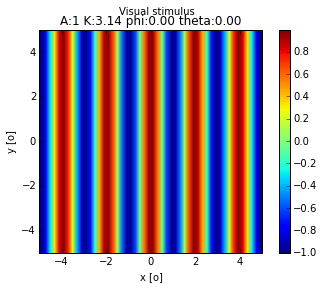

In [17]:
A     = 1
K     = np.pi
phi   = 0
theta = 0
stim = A*np.cos(K*xv*np.cos(theta) + K*yv*np.sin(theta)- phi)
plt.imshow(stim, extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.title('A:{} K:{:.2f} phi:{:.2f} theta:{:.2f}'.format(A,K,phi,theta))
plt.suptitle('Visual stimulus')
plt.xlabel('x [o]')
plt.ylabel('y [o]')
plt.colorbar()
plt.show()

With given parameters resultes stimulus has shape of harmonic wave  with period 2 along x axis.

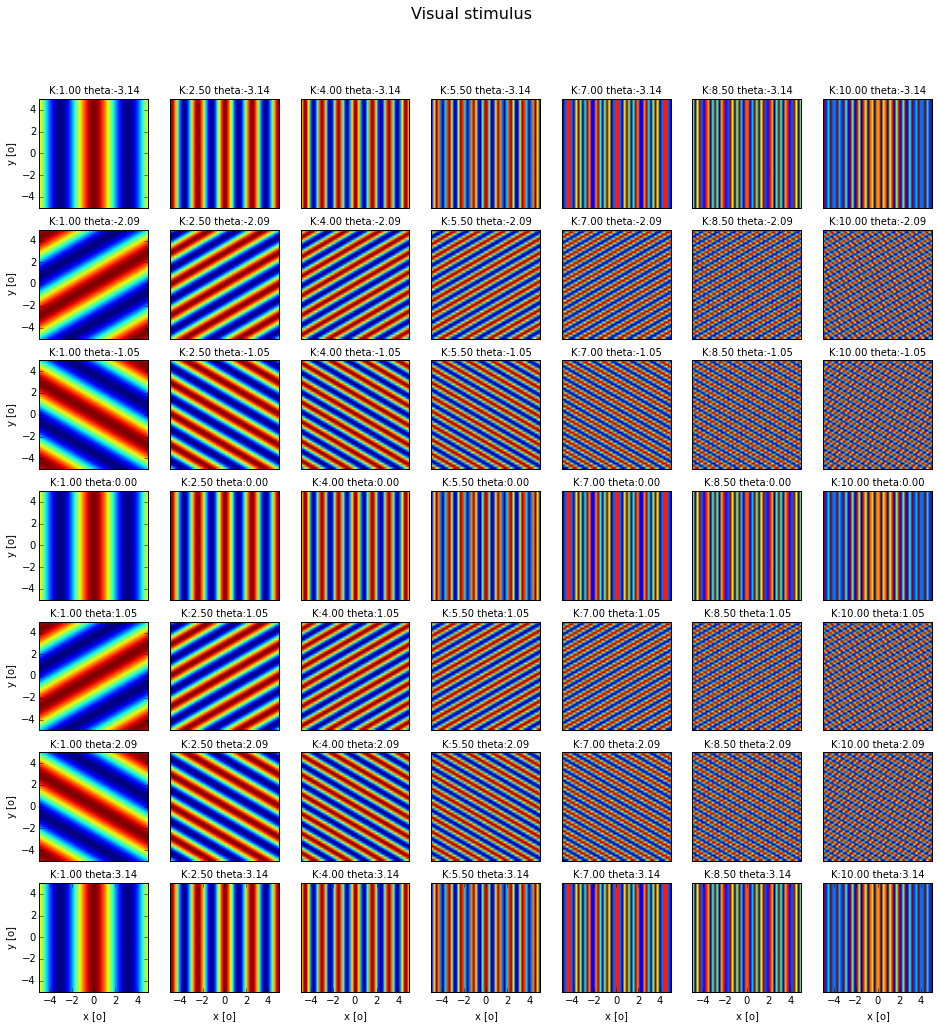

In [12]:
thetas = np.linspace(-np.pi,np.pi,7)
Kvec = np.linspace(1,10,7)

fig, axes = plt.subplots(len(thetas),len(Kvec), figsize=(16,16))
for e, t in enumerate(thetas):
    for j, k in enumerate(Kvec):
        s = A*np.cos(k*xv*np.cos(t) + k*yv*np.sin(t)- phi)
        axes[e, j].imshow(s, extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
        axes[e, j].set_title('K:{:.2f} theta:{:.2f}'.format(k,t), fontsize=10)
        if j == 0:
            axes[e, j].set_ylabel('y [o]')
        if e == len(Kvec)-1:
            axes[e, j].set_xlabel('x [o]')
        if e != len(Kvec)-1:
            axes[e, j].get_xaxis().set_visible(False)
        if j != 0:
            axes[e, j].get_yaxis().set_visible(False)

        
plt.suptitle('Visual stimulus', fontsize=16)
plt.show()

The plot above shows how our stimulus varies with respect to two parameters $K$ and $\theta$. $K$ changes in columns and $\theta$ in rows. We can see that $K$ is responsible for increasing frequency of the wave. $\theta$ gives orientation of the stimuli.

### 2. A model of receptive fields

In [13]:
def gabor(x, y, sig_x, sig_y, K, phi):
    return (np.exp(-(x**2/(2*sig_x**2))-((y**2/(2*sig_y**2))))*np.cos(K*x-phi))/(2*np.pi*sig_x*sig_y)

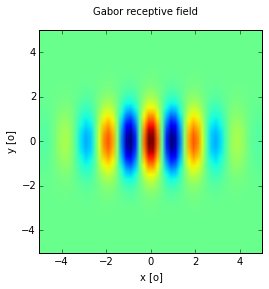

In [14]:
sig_x = 2
sig_y = 1
K     = np.pi
phi   = 0

gab = gabor(xv,yv,sig_x,sig_y,K,phi)
plt.imshow(gab, extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.suptitle('Gabor receptive field')
plt.xlabel('x [o]')
plt.ylabel('y [o]')
plt.show()

b) Optimal stimuli to that receptive field would be horizontal cosinusoidal wave with the same spatial frequency $k$. The neuron with such a receptive field could be found in retina in area responsible for detecting edges. This RF characterize simple cell because it has only real values. Complex cells are then modeled by computing the modulus of complex Gabor responses.

In [18]:
def response(stim, recfield):
    return dx*dy*np.sum(stim*recfield)
r_s1 = response(stim, gab)
r_s2 = response(np.ones(gab.shape), gab)
print('Response to stimulus: ', r_s1)
print('Response to uniform visual field: ', r_s2)

Response to stimulus:  0.495227747141
Response to uniform visual field:  0.000315752658841


We see that response to stimulus is much higher than to uniformly distributed visual field. This is due to the fact that the stimulus image has exactly the same orientation and spatial frequency as receptive field. Because of that both positive and negative values of stimulus gives contribution to final response. Something opposite happens in second case. Positive values are strengthened but also impaired by negative parts of RF. Then from symmetry in average we get almost 0.

### 3. Tuning Curve

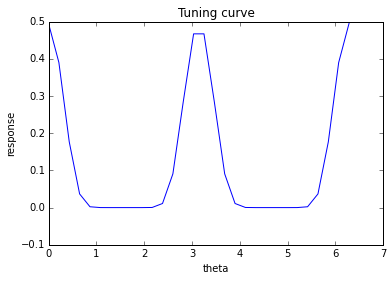

In [19]:
thetas = np.linspace(0,2*np.pi,30)
Kvec = np.linspace(0,10,7)
resps = np.zeros(len(thetas))
for e,t in enumerate(thetas):
    s_ = A*np.cos(K*xv*np.cos(t) + K*yv*np.sin(t)- phi)
    resps[e] = response(s_, gab)

plt.plot(thetas, resps)
plt.xlabel('theta')
plt.ylabel('response')
plt.title('Tuning curve')
plt.show()

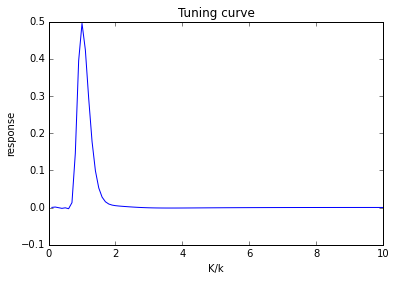

In [20]:
Kvec = np.linspace(0.1,10,100)
resps = np.zeros(len(Kvec))
for e, k in enumerate(Kvec):
    s_ = A*np.cos((K/k)*xv*np.cos(theta) + (K/k)*yv*np.sin(theta)- phi)
    resps[e] = response(s_, gab)

plt.plot(Kvec, resps)
plt.xlabel('K/k')
plt.ylabel('response')
plt.title('Tuning curve')
plt.show()

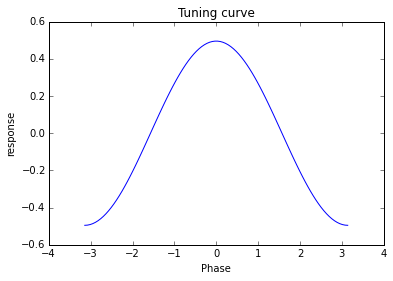

In [21]:
phases = np.linspace(-np.pi,np.pi,100)
resps = np.zeros(len(Kvec))
for e, ph in enumerate(phases):
    s_ = A*np.cos(K*xv*np.cos(theta) + K*yv*np.sin(theta)- ph)
    resps[e] = response(s_, gab)

plt.plot(phases, resps)
plt.xlabel('Phase')
plt.ylabel('response')
plt.title('Tuning curve')
plt.show()

From plots above we may conclude that exists some set of values that gives maximum response. All parameters are strictly related to how our receptive field is defined. For completly different values of parameters decribing Gabor function we would get much different tunning curves.

### 4. Image filtering

In [22]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
img = plt.imread('berlin.png')
img_gr = rgb2gray(img)

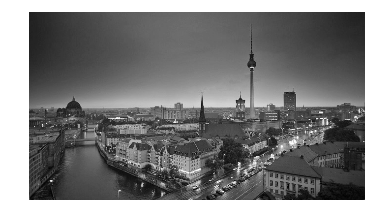

In [23]:
plt.imshow(img_gr, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [26]:
sig_x = 1./8
sig_y = 1./8
K     = 8*np.pi
phi   = np.pi/2

gab = gabor(xv,yv,sig_x,sig_y,K,phi)

convim = ss.fftconvolve(img_gr, gab, 'same')

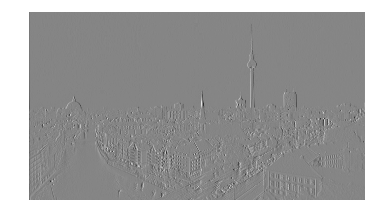

In [27]:
plt.imshow(convim, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

Transformation of the picture above enhanced edges of all buildings on the plot. In result we get picture similar to relief. That's agree with the statement that receptive fields work as filters which strengthen particular features of the picture.